<a href="https://colab.research.google.com/github/epicprogrammer91/AML-Final-Project/blob/main/Benford's_Law_in_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benford's Law - Definition
Benford's law talks about probability distribution of first digits of numbers in real-life datasets.<BR>
<BR>Every positive decimal number $x$ can be seen as lying between magnitudes of 10:
<BR>$10^{⌊\log_{10}x⌋} \le x ≤ 10^{⌈\log_{10}x⌉}$
<BR>(mind $⌊$floor$⌋$ and $⌈$ceiling$⌉$ operators).
<BR><BR>For a random value  $x$ to start with a decimal digit  $d$ ($d ∈ \{1, ..., 9\}$), the following must hold:
<BR>$d ≤ \frac{x}{10^{⌊\log_{10}x⌋}} < d + 1$
<BR><BR>taking log of each part:
<BR>$log_{10}d ≤ log_{10}x - ⌊\log_{10}x⌋ < \log_{10}(d+1)$
<BR><BR>Mention, that these intervals are consequent and
<BR>for the first $d = 1: log_{10}d = 0$
<BR>for the last $d = 9: log_{10}(d+1) = 1$
<BR>Thus, 9 intervals above exactly cover [0, 1). That's obvious, also because a fractional part of a number is [0,1).
<BR><BR>
Now let's assume that a fractional part of $log_{10}x$ is distributed uniformly:
<BR>$log_{10}x - ⌊\log_{10}x⌋ \sim U[0,1)$
<BR><BR>Then the probability of each leading digit $d$ will be equal to length  of corresponding interval:
<BR> $P(d) = log_{10}(d+1) - \log_{10}d$

To summarize:
<BR>A set of data satisfies Benford's Law if its leading digit $d$ occurs with probability: 
$P(d) = log_{10}(d+1) - \log_{10}d$
<BR>That will happen, if a data comes from the distribution, such that the fractional part of its logarithm is distributed uniformly.

Some distributions which will produce data satisfying Benford's Law:
- distribution whose logarithm is distributed uniformly. This is because it should be easy to prove, that a fractional part of uniformly distributed random variable is itself uniformly distributed.
- other distributions, like triangular and other.

# ECG Interpretation
ECG pictures heart’s electrical activity in 12 different positions picked up by 10 electrodes.

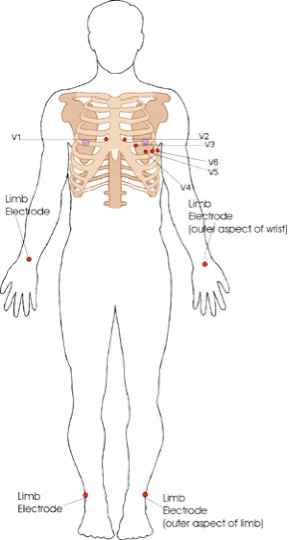

Figure 1. 10 electrodes: 6 chest electrodes and 4 limb electrodes.

The 12 areas represented on the ECG are:
* V1, V2 = RV
* V3, V4 = septum
* V5, V6 = L side of the heart
* Lead I = L side of the heart
* Lead II = inferior territory
* Lead III = inferior territory
* aVF = inferior territory (remember ‘F’ for ‘feet’)
* aVL = L side of the heart
* aVR = R side of the heart



```
# This is formatted as code
```

# Publicly available ECG datasets
### Dataset format
The prevalent format of publicly availabe ECG datasets is
<BR>standard set of 12-lead ECGs (listed above),
<BR>of 10 second length.
<BR> Thus, each ECG is a 12 columns x 5000 rows dataset.

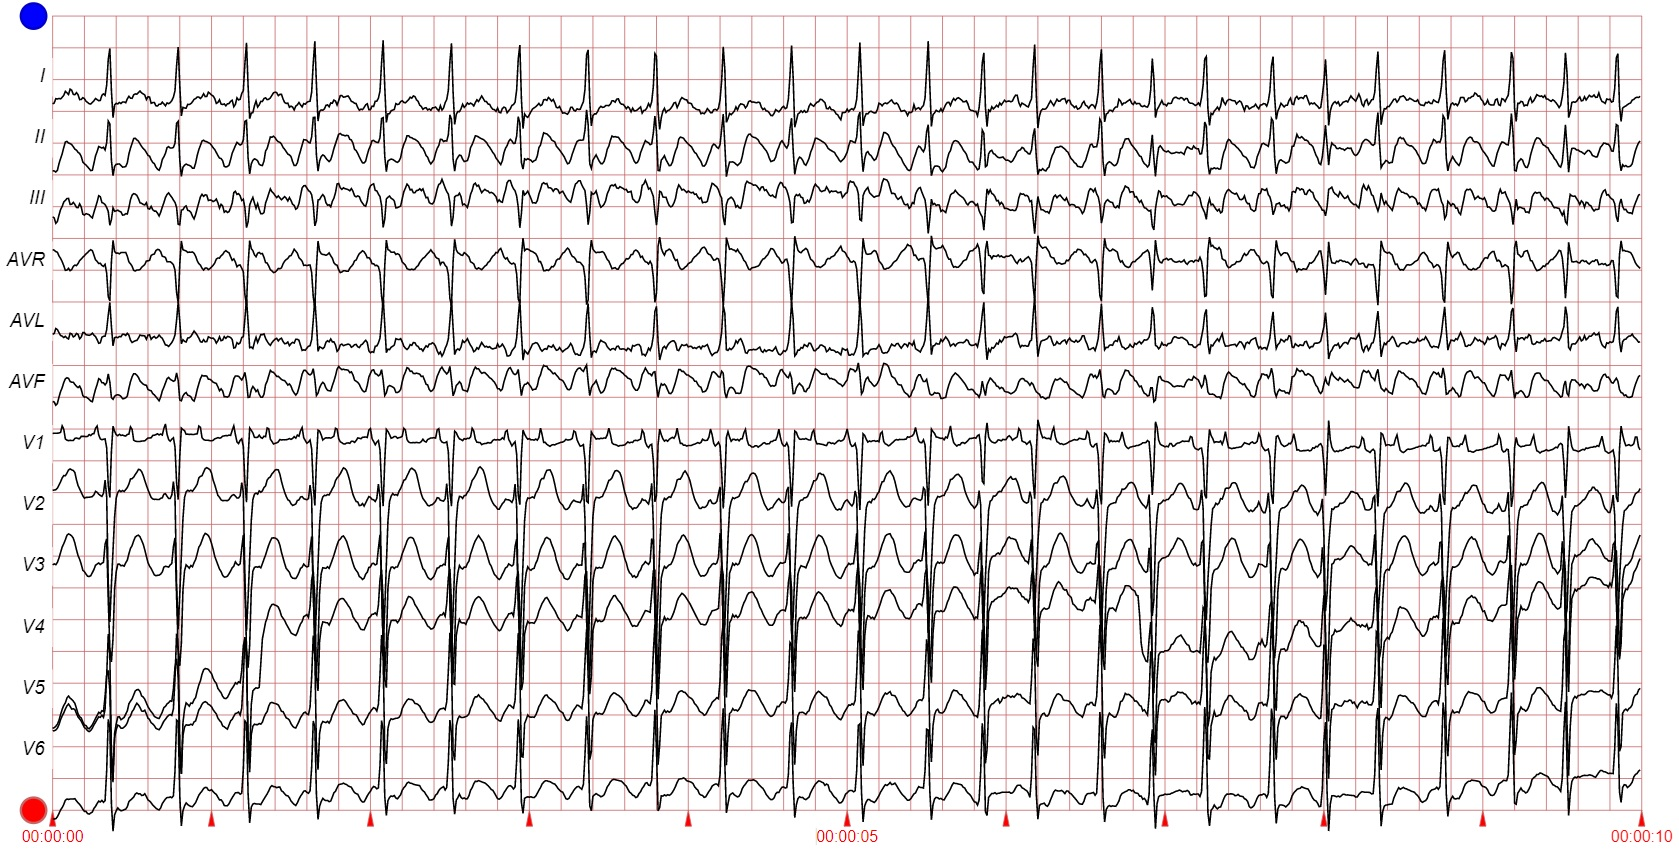

...

In [ ]:
import sys
import os
from google.colab import drive
drive.mount('/content/gdrive')
# https://drive.google.com/drive/folders/1m4X-M2jVZGx2txr11aal_4hCu6jtwPS1?usp=share_link
#drive.mount('https://drive.google.com/drive/folders/1m4X-M2jVZGx2txr11aal_4hCu6jtwPS1?usp=share_link')
#!unzip "/content/gdrive/My Drive/data.zip"
#!touch "/content/gdrive/My Drive/dataloader.py"
sys.path.append('/content/gdrive/MyDrive/datasets')
#sys.path.append('/content/gdrive/MyDrive/')
print(sys.path)

'''
NOTE: 
If error message appears:
you may need to create shortcut of dataset folder to My Drive:
right-click datasets folder and select "Add shortcut to Drive"
'''


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/MyDrive/datasets', '/content/gdrive/MyDrive/datasets']


'\nNOTE: \nIf error message appears:\nyou may need to create shortcut of dataset folder to My Drive:\nright-click datasets folder and select "Add shortcut to Drive"\n'

# Bibliography
1. Pavithraa Seenivasan, Soumya Easwaran, Seshan Sridhar and Sitabhra Sinha. 2015. Using Skewness and the First-Digit Phenomenon to Identify Dynamical Transitions in Cardiac Models https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4707587/
2. P.E. McSharry; G.D. Clifford; L. Tarassenko; L.A. Smith. 2003. A dynamical model for generating synthetic electrocardiogram signals https://ieeexplore.ieee.org/document/1186732

In [ ]:
##### kuiper
from scipy import stats
from scipy.stats import norm
from astropy.stats import kuiper

from functools import partial
from random import shuffle
import numpy as np
import pandas as pd

np.random.seed(0)
data = np.random.normal(loc=0.02, scale=1.15, size=50)
print(data)
print(kuiper(data, partial(norm.cdf, loc=0.2, scale=2.0)))

# Output: (0.2252118027033838, 0.08776036566607946)

# The data does not have to be sorted, in case you wondered:
shuffle(data)

print(kuiper(data, partial(norm.cdf, loc=0.2, scale=2.0)))

# Output: (0.2252118027033838, 0.08776036566607946)
# https://stackoverflow.com/questions/63599689/how-to-use-astropy-kuiper-test
# https://docs.astropy.org/en/stable/api/astropy.stats.kuiper.html
# https://www.youtube.com/watch?v=4GKpkXJKgxM&t=674s

In [ ]:
#### Cho & Gaines's d
# https://blog.bigml.com/2015/05/15/detecting-numeric-irregularities-with-benfords-law/
# https://github.com/danielmccarville/Benfords

import benfords as bf

#Generate some random data
test_data = bf.variate(1000)

#Compare to Benford's Law
print(bf.benfords(test_data))
#  Digit  Expected Value  Actual Value  Difference
#0     1        0.301030         0.316    0.014970
#1     2        0.176091         0.178    0.001909
#2     3        0.124939         0.113   -0.011939
#3     4        0.096910         0.097    0.000090
#4     5        0.079181         0.075   -0.004181
#5     6        0.066947         0.072    0.005053
#6     7        0.057992         0.059    0.001008
#7     8        0.051153         0.041   -0.010153
#8     9        0.045757         0.049    0.003243


# Currently, test() supports only the d statistic described in Cho and Gaines, 2012. 
# Future releases will include additional test statistics.
bf.test(bf.benfords(test_data), test_statistic='d')
# 0.01914657325117365


In [ ]:
# generate 50 random nums following Benford distribution:
bf.variate(50)

In [ ]:
# copied below function from: 
# https://github.com/danielmccarville/Benfords/blob/Release/benfords.py
def test(data, test_statistic='d'):
    """ Given the results of benfords(), return a test statistic or hypothesis test. """

    if test_statistic not in ['d']:
        return 'Test statistic '+test_statistic+' is not recognized or is not currenly supported.'

    #Cho and Gaines d statistic.
    if test_statistic == 'd':
        data['diff_squ'] = data['Difference']**2
        d = sqrt(data['diff_squ'].sum())
        return d
